<a href="https://colab.research.google.com/github/burgerhaley97/LandUseBL/blob/main/6685_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
# Get it from kaggle
import kagglehub
parisrohan_credit_score_classification_path = kagglehub.dataset_download('parisrohan/credit-score-classification')

100%|██████████| 9.51M/9.51M [00:00<00:00, 57.7MB/s]

Extracting files...


In [ ]:
# check path
print(parisrohan_credit_score_classification_path)

/root/.cache/kagglehub/datasets/parisrohan/credit-score-classification/versions/1


In [ ]:
import os

data_path = "/root/.cache/kagglehub/datasets/parisrohan/credit-score-classification/versions/1"
print(os.listdir(data_path))


['train.csv', 'test.csv']


In [ ]:
'''
Don't need the test data set since it is unlabled.

'''

In [ ]:
import pandas as pd
import os

import pandas as pd

# define the test / train files
train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))
train_df.head()

<ipython-input-83-4100083c6318>:7: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [ ]:
# Coerce NaNs to 0 when counting loans
train_df['Num_of_Loans'] = train_df['Type_of_Loan'].apply(
    lambda x: len(str(x).split(',')) if pd.notna(x) and str(x).strip() != '' else 0
)


In [ ]:
train_df['Num_of_Loan'].head()

,Num_of_Loan
0,4
1,4
2,4
3,4
4,4


In [ ]:
train_df['Payment_Behaviour'].head()

,Payment_Behaviour
0,High_spent_Small_value_payments
1,Low_spent_Large_value_payments
2,Low_spent_Medium_value_payments
3,Low_spent_Small_value_payments
4,High_spent_Medium_value_payments


In [ ]:
# Remove any invalid values if present
train_df = train_df[train_df['Payment_Behaviour'] != '!@9#%8']

# Split into separate columns
train_df[['Spending_Level', 'Payment_Value']] = train_df['Payment_Behaviour'].str.split('_', n=1, expand=True)

# Clean the Payment_Value column
train_df['Payment_Value'] = train_df['Payment_Value'].str.replace('spent_', '', regex=False)
train_df['Payment_Value'] = train_df['Payment_Value'].str.replace('_value_payments', '', regex=False)

# Map to numeric values
train_df['Spending_Level_Num'] = train_df['Spending_Level'].map({'High': 1, 'Low': 0})
train_df['Payment_Value_Num'] = train_df['Payment_Value'].map({'Small': 1, 'Medium': 2, 'Large': 3})

# Drop original string columns
train_df.drop(['Payment_Behaviour', 'Spending_Level', 'Payment_Value'], axis=1, inplace=True)


<ipython-input-87-bbb280cd11e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[['Spending_Level', 'Payment_Value']] = train_df['Payment_Behaviour'].str.split('_', n=1, expand=True)
<ipython-input-87-bbb280cd11e5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[['Spending_Level', 'Payment_Value']] = train_df['Payment_Behaviour'].str.split('_', n=1, expand=True)
<ipython-input-87-bbb280cd11e5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [ ]:
train_df = train_df.drop(columns=['Name','ID', 'SSN','Type_of_Loan'])


In [ ]:
train_df['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [ ]:
# Define a mapping dictionary
credit_mix_mapping = {
    'Bad': 0,
    'Standard': 1,
    'Good': 2,
    '_': -1  # or np.nan if you want to treat it as missing
}

# Apply the mapping
train_df['Credit_Mix_Num'] = train_df['Credit_Mix'].map(credit_mix_mapping)


# EDA/Summary Stats

In [ ]:
# Get some simple summary stats
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 92400 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               92400 non-null  object 
 1   Age                       92400 non-null  object 
 2   Occupation                92400 non-null  object 
 3   Annual_Income             92400 non-null  object 
 4   Monthly_Inhand_Salary     78558 non-null  float64
 5   Num_Bank_Accounts         92400 non-null  int64  
 6   Num_Credit_Card           92400 non-null  int64  
 7   Interest_Rate             92400 non-null  int64  
 8   Num_of_Loan               92400 non-null  object 
 9   Type_of_Loan              81880 non-null  object 
 10  Delay_from_due_date       92400 non-null  int64  
 11  Num_of_Delayed_Payment    85980 non-null  object 
 12  Changed_Credit_Limit      92400 non-null  object 
 13  Num_Credit_Inquiries      90594 non-null  float64
 14  Credit_Mix 

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Num_of_Loans,Spending_Level_Num,Payment_Value_Num,Credit_Mix_Num
count,78558.000000,92400.000000,92400.000000,92400.000000,92400.000000,90594.000000,92400.000000,92400.000000,92400.000000,92400.000000,92400.000000,92400.000000
mean,4193.007766,17.078355,22.458258,72.601299,21.068907,27.871360,32.285537,1408.948563,3.528582,0.461050,1.862478,0.649329
std,3184.528231,117.333044,128.953017,467.720459,14.878533,194.102615,5.118272,8324.648660,2.443213,0.498483,0.800785,1.057874
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000,0.000000,0.000000,1.000000,-1.000000
25%,1623.729167,3.000000,4.000000,8.000000,10.000000,3.000000,28.053576,30.291558,2.000000,0.000000,1.000000,0.000000
50%,3089.149167,6.000000,5.000000,13.000000,18.000000,6.000000,32.304018,69.100853,3.000000,0.000000,2.000000,1.000000
75%,5964.883333,7.000000,7.000000,20.000000,28.000000,9.000000,36.496305,160.992411,5.000000,1.000000,3.000000,1.000000
max,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2597.000000,50.000000,82331.000000,9.000000,1.000000,3.000000,2.000000


In [ ]:
# check for NAs
# count missing values per column
missing = train_df.isna().sum().sort_values(ascending=False)
print("Missing values:\n", missing[missing > 0])


Missing values:
 Monthly_Inhand_Salary      13842
Type_of_Loan               10520
Credit_History_Age          8341
Num_of_Delayed_Payment      6420
Amount_invested_monthly     4132
Num_Credit_Inquiries        1806
Monthly_Balance             1105
dtype: int64


In [ ]:
# visualize the missing data
null_train = train_df.isna().sum()

<Axes: >

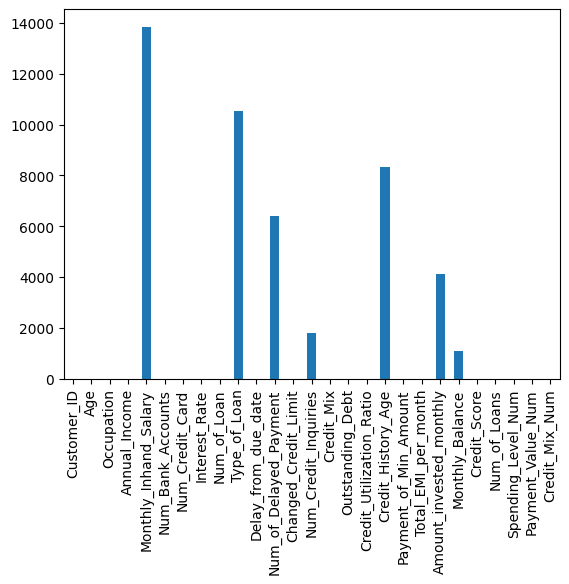

In [ ]:
null_train.plot(kind='bar')


In [ ]:
'''
Look at categorical and numerical vars separately

'''

In [ ]:
# Numerical features
numerical_cols = train_df.select_dtypes(include='number').columns

# Categorical features
categorical_cols = train_df.select_dtypes(include='object').columns


In [ ]:
train_df[numerical_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,78558.0,4193.007766,3184.528231,303.645417,1623.729167,3089.149167,5964.883333,15204.633333
Num_Bank_Accounts,92400.0,17.078355,117.333044,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,92400.0,22.458258,128.953017,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,92400.0,72.601299,467.720459,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,92400.0,21.068907,14.878533,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,90594.0,27.871360,194.102615,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,92400.0,32.285537,5.118272,20.000000,28.053576,32.304018,36.496305,50.000000
Total_EMI_per_month,92400.0,1408.948563,8324.648660,0.000000,30.291558,69.100853,160.992411,82331.000000
Num_of_Loans,92400.0,3.528582,2.443213,0.000000,2.000000,3.000000,5.000000,9.000000
Spending_Level_Num,92400.0,0.461050,0.498483,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(train_df[col].value_counts(dropna=False))



Customer_ID value counts:
Customer_ID
CUS_0xf16     8
CUS_0x2c0a    8
CUS_0x334b    8
CUS_0xc345    8
CUS_0x9674    8
             ..
CUS_0x6c9e    4
CUS_0x7ccf    4
CUS_0xab9     4
CUS_0xaca7    3
CUS_0xb648    3
Name: count, Length: 12500, dtype: int64

Age value counts:
Age
38      2623
28      2607
31      2605
26      2593
25      2534
        ... 
7879       1
325        1
6611       1
3779       1
3966       1
Name: count, Length: 1660, dtype: int64

Occupation value counts:
Occupation
_______          6548
Lawyer           6079
Architect        5894
Engineer         5867
Mechanic         5810
Scientist        5798
Accountant       5790
Teacher          5767
Entrepreneur     5741
Media_Manager    5739
Developer        5729
Journalist       5624
Doctor           5620
Manager          5513
Musician         5479
Writer           5402
Name: count, dtype: int64

Annual_Income value counts:
Annual_Income
17273.83      16
33029.66      15
36585.12      15
17816.75      14
95596.35    

In [ ]:
import pandas as pd
import numpy as np

# Function to convert the "X Years and Y Months" format to total months
def convert_to_months(age_str):
    if pd.isna(age_str):
        return np.nan  # or 0 if you prefer to fill NaNs with 0
    parts = age_str.split()
    years = int(parts[0])
    months = int(parts[3])
    return years * 12 + months

# Apply the function to create a new column
train_df['Credit_History_Months'] = train_df['Credit_History_Age'].apply(convert_to_months)

# Drop the original text column
train_df.drop(columns=['Credit_History_Age'], inplace=True)


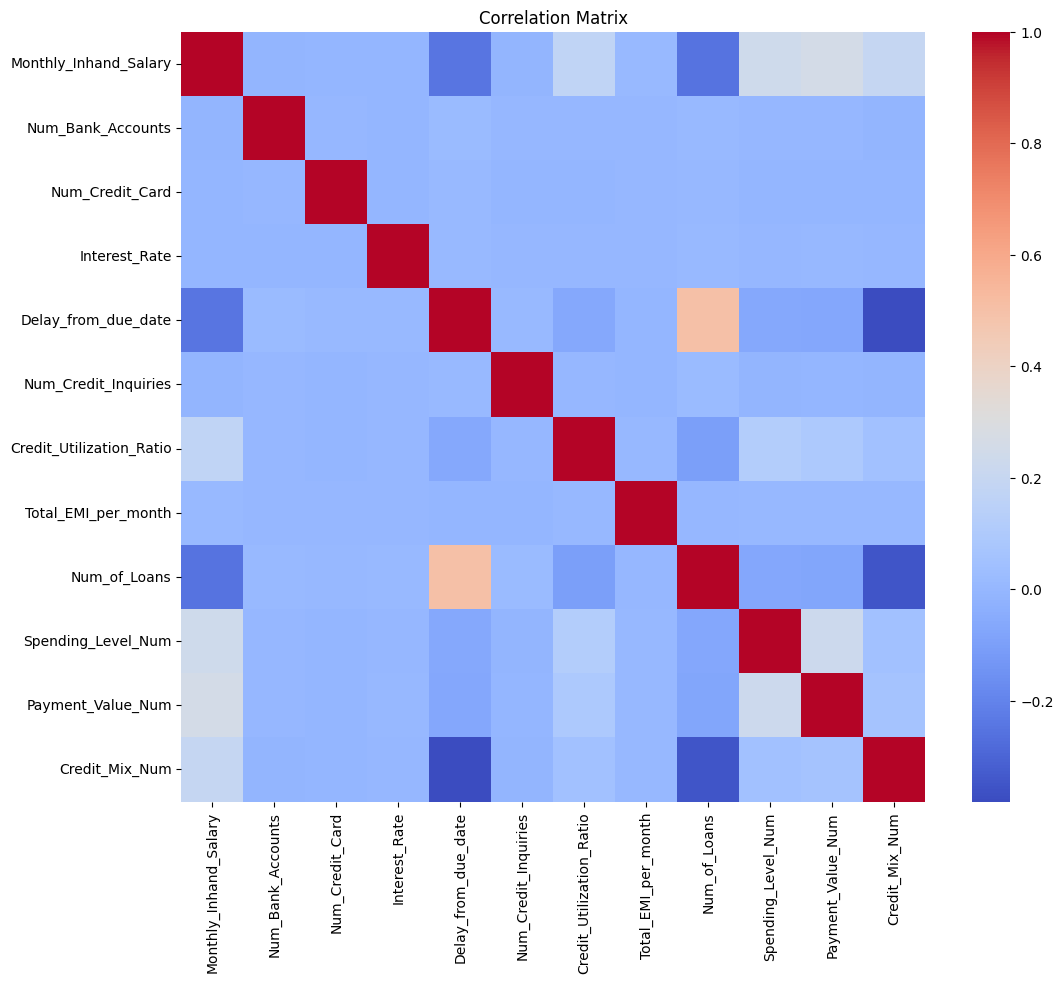

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(train_df[numerical_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()


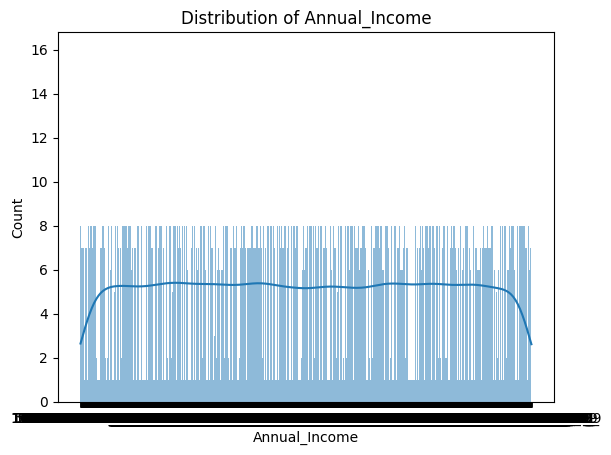

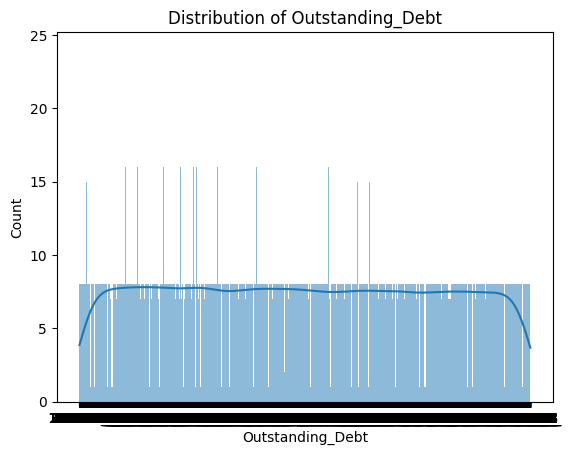

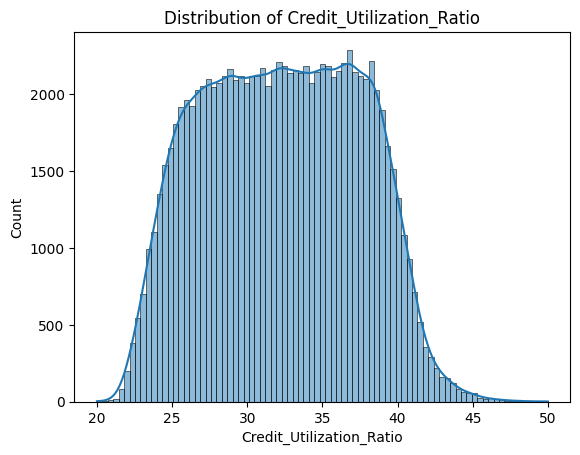

In [ ]:
for col in ['Annual_Income', 'Outstanding_Debt', 'Credit_Utilization_Ratio']:
    sns.histplot(train_df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


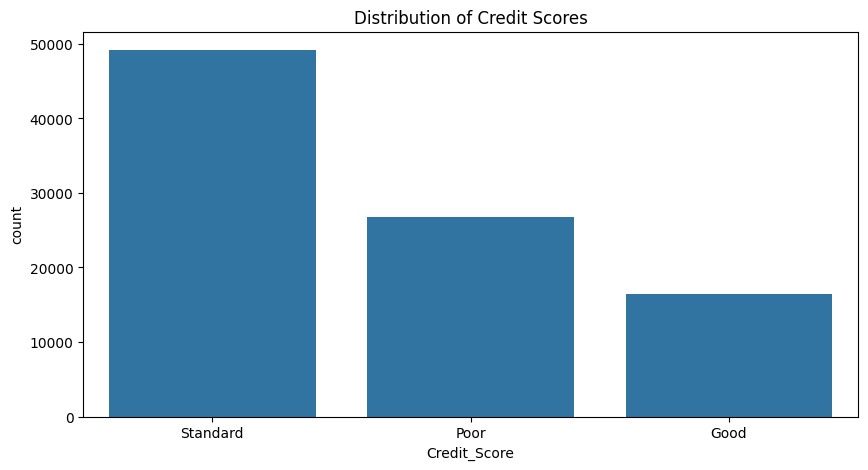

In [ ]:
# check for class imbalance
plt.figure(figsize=(10, 5))
sns.countplot(x=train_df['Credit_Score'], order=train_df['Credit_Score'].value_counts().index)
plt.title("Distribution of Credit Scores")
plt.show()

# Data Cleaning

In [ ]:
'''
prep the data for the RNN
'''

In [ ]:
# Recode Credit_Score: Poor=1, Standard=2, Good=3
score_map = {'Poor': 0, 'Standard': 1, 'Good': 2}
train_df['Credit_Score_Encoded'] = train_df['Credit_Score'].map(score_map)

# Check encoding
print(train_df['Credit_Score_Encoded'].value_counts())


Credit_Score_Encoded
1    49182
0    26773
2    16445
Name: count, dtype: int64


In [ ]:
## Handle missing values (NaNs or __)
# Grouped imputation by customer (preserves time series trends)
import numpy as np

train_df['Monthly_Inhand_Salary'] = train_df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
train_df['Credit_Mix'].replace('_', np.nan, inplace=True)
train_df['Credit_Mix'].fillna(train_df['Credit_Mix'].mode()[0], inplace=True)


<ipython-input-94-bb0844756834>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df['Monthly_Inhand_Salary'] = train_df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
<ipython-input-94-bb0844756834>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Credit_Mix'].replace('_', np.nan, inplace=True)
<ipython-input-94-bb0844756834>:7: FutureWarning: A value is 

In [ ]:
import re

def clean_numeric_column(col):
    # Remove underscores or any non-numeric characters (except dot and minus)
    col = col.astype(str).str.extract(r'([-+]?\d*\.?\d+)')[0]
    return pd.to_numeric(col, errors='coerce')

# List of columns to clean
dirty_columns = ['Age', 'Annual_Income', 'Outstanding_Debt', 'Monthly_Balance']

for col in dirty_columns:
    train_df[col] = clean_numeric_column(train_df[col])
    median_val = train_df[col].median()
    train_df[col].fillna(median_val, inplace=True)

# (Optional) Check that it's clean now
print(train_df[dirty_columns].dtypes)


<ipython-input-95-239923f2e648>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(median_val, inplace=True)
<ipython-input-95-239923f2e648>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Age                   int64
Annual_Income       float64
Outstanding_Debt    float64
Monthly_Balance     float64
dtype: object


<ipython-input-95-239923f2e648>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(median_val, inplace=True)


In [ ]:
from scipy.stats import zscore

# Apply to numerical columns
numeric_cols = train_df.select_dtypes(include='number').columns

z_scores = train_df[numeric_cols].apply(zscore)
outliers_z = (np.abs(z_scores) > 3)  # Flag values where |z| > 3 to look at outliers
outlier_counts = outliers_z.sum().sort_values(ascending=False)
print(outlier_counts)


Total_EMI_per_month         2011
Num_Credit_Card             1512
Interest_Rate               1388
Age                         1310
Num_Bank_Accounts            970
Monthly_Inhand_Salary        965
Annual_Income                767
Outstanding_Debt             549
Delay_from_due_date           53
Credit_Utilization_Ratio      16
Monthly_Balance                9
Num_Credit_Inquiries           0
Num_of_Loans                   0
Spending_Level_Num             0
Payment_Value_Num              0
Credit_Mix_Num                 0
Credit_History_Months          0
Credit_Score_Encoded           0
dtype: int64


In [ ]:
# Sort 'Age' column from high to low
sorted_age = train_df['Age'].sort_values(ascending=False)
print(sorted_age)

71732    8698
35557    8682
82335    8678
13372    8674
25095    8669
         ... 
71156    -500
71149    -500
21228    -500
57595    -500
88260    -500
Name: Age, Length: 92400, dtype: int64


In [ ]:
# Cap outliers
def cap_outliers(df, col):
    lower = df[col].quantile(0.05)
    upper = df[col].quantile(0.95)
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
    return df

# Apply to selected columns
for col in ['Total_EMI_per_month', 'Num_Credit_Card', 'Interest_Rate', 'Num_Bank_Accounts', 'Monthly_Balance', 'Interest_Rate', 'Age']:
    train_df = cap_outliers(train_df, col)


In [ ]:

# Apply to numerical columns
numeric_cols = train_df.select_dtypes(include='number').columns

z_scores = train_df[numeric_cols].apply(zscore)
outliers_z = (np.abs(z_scores) > 3)  # Flag values where |z| > 3 to look at outliers
outlier_counts = outliers_z.sum().sort_values(ascending=False)
print(outlier_counts)


Monthly_Inhand_Salary       965
Annual_Income               767
Outstanding_Debt            549
Delay_from_due_date          53
Credit_Utilization_Ratio     16
Age                           0
Interest_Rate                 0
Num_Credit_Card               0
Num_Bank_Accounts             0
Num_Credit_Inquiries          0
Total_EMI_per_month           0
Monthly_Balance               0
Num_of_Loans                  0
Spending_Level_Num            0
Payment_Value_Num             0
Credit_Mix_Num                0
Credit_History_Months         0
Credit_Score_Encoded          0
dtype: int64


In [ ]:
# Apply to skewed columns
skewed_cols = ['Monthly_Inhand_Salary', 'Annual_Income', 'Outstanding_Debt',
               'Delay_from_due_date', 'Credit_Utilization_Ratio']

for col in skewed_cols:
    train_df[col] = np.log1p(train_df[col])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
# Apply to numerical columns
numeric_cols = train_df.select_dtypes(include='number').columns

z_scores = train_df[numeric_cols].apply(zscore)
outliers_z = (np.abs(z_scores) > 3)  # Flag values where |z| > 3 to look at outliers
outlier_counts = outliers_z.sum().sort_values(ascending=False)
print(outlier_counts)

Outstanding_Debt            1262
Annual_Income                895
Age                            0
Monthly_Inhand_Salary          0
Num_Credit_Card                0
Num_Bank_Accounts              0
Interest_Rate                  0
Delay_from_due_date            0
Num_Credit_Inquiries           0
Credit_Utilization_Ratio       0
Total_EMI_per_month            0
Monthly_Balance                0
Num_of_Loans                   0
Spending_Level_Num             0
Payment_Value_Num              0
Credit_Mix_Num                 0
Credit_History_Months          0
Credit_Score_Encoded           0
dtype: int64


In [ ]:
# Create new feature: debt to income ratio
train_df['Debt_Income_Ratio'] = train_df['Outstanding_Debt'] / (train_df['Annual_Income'] + 1e-6)


In [ ]:
# Sort by customer ID and time
train_df['Month_Ordinal'] = pd.Categorical(train_df['Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True).codes

train_df.sort_values(by=['Customer_ID', 'Month_Ordinal'], inplace=True)


In [ ]:
train_df['Month'].nunique()


8

In [ ]:
# One-hot encode
train_df = pd.get_dummies(train_df, columns=['Occupation'], drop_first=True)


In [ ]:
train_df['Num_of_Delayed_Payment'] = pd.to_numeric(train_df['Num_of_Delayed_Payment'], errors='coerce')
train_df['Amount_invested_monthly'] = pd.to_numeric(train_df['Amount_invested_monthly'], errors='coerce')


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92400 entries, 56752 to 99159
Data columns (total 44 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               92400 non-null  object 
 1   Month                     92400 non-null  object 
 2   Age                       92400 non-null  float64
 3   Annual_Income             92400 non-null  float64
 4   Monthly_Inhand_Salary     92400 non-null  float64
 5   Num_Bank_Accounts         92400 non-null  float64
 6   Num_Credit_Card           92400 non-null  float64
 7   Interest_Rate             92400 non-null  float64
 8   Num_of_Loan               92400 non-null  object 
 9   Delay_from_due_date       92052 non-null  float64
 10  Num_of_Delayed_Payment    85980 non-null  object 
 11  Changed_Credit_Limit      92400 non-null  object 
 12  Num_Credit_Inquiries      90594 non-null  float64
 13  Credit_Mix                92400 non-null  object 
 14  Outstan

In [ ]:
import numpy as np
# Step 1: Select the features that vary over time
features_sub = [
    'Annual_Income',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loans',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_Utilization_Ratio',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Debt_Income_Ratio',
    'Credit_History_Months',
    'Month_Ordinal'
]

# Dynamically add all columns that start with "Occupation_"
occupation_cols = [col for col in train_df.columns if col.startswith('Occupation_')]

# Combine them
features = features_sub + occupation_cols

NameError: name 'train_df' is not defined

In [ ]:
non_numeric_cols = [col for col in features if not pd.api.types.is_numeric_dtype(train_df[col])]
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: ['Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Amount_invested_monthly']


In [ ]:
train_df['Amount_invested_monthly'].head()

,Amount_invested_monthly
56752,244.75028300769162
56753,176.13256665597928
56754,109.05651876486915
56756,191.8347674990596
56757,114.80240059146288


In [ ]:
# Attempt to convert all selected features to numeric, coercing errors to NaN
for col in features:
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')


In [ ]:
#fill missing values with median
train_df[features] = train_df[features].fillna(train_df[features].median())



In [ ]:
# Check if any column still has missing values
print(train_df[features].isna().sum())

# OR check total missing values
print("Total missing values:", train_df[features].isna().sum().sum())

# Check if *any* missing values exist
print("Any missing values?", train_df[features].isna().any().any())


Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loans                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
Debt_Income_Ratio           0
Credit_History_Months       0
Month_Ordinal               0
Occupation_Architect        0
Occupation_Developer        0
Occupation_Doctor           0
Occupation_Engineer         0
Occupation_Entrepreneur     0
Occupation_Journalist       0
Occupation_Lawyer           0
Occupation_Manager          0
Occupation_Mechanic         0
Occupation_Media_Manager    0
Occupation_Musician         0
Occupation_Scientist        0
Occupation_Teacher          0
Occupation_Writer           0
Occupation________          0
dtype: int

In [ ]:
# Check if any value is inf or -inf in the DataFrame
has_inf = np.isinf(train_df.select_dtypes(include=[np.number])).values.any()

print("Any inf or -inf values in train_df?", has_inf)

Any inf or -inf values in train_df? True


In [ ]:
import numpy as np

# Get only numeric columns
numeric_df = train_df.select_dtypes(include=[np.number])

# Find which numeric columns contain inf or -inf
cols_with_inf = numeric_df.columns[np.isinf(numeric_df).any()]

print("Columns with inf values:", list(cols_with_inf))


Columns with inf values: ['Delay_from_due_date']


In [ ]:
# View rows where 'Delay_from_due_date' is inf or -inf
inf_rows = train_df[np.isinf(train_df['Delay_from_due_date'])]

# Display them
print(inf_rows)


      Customer_ID     Month   Age  Annual_Income  Monthly_Inhand_Salary  \
30826  CUS_0x1220     March  31.0      11.763649               9.266898   
47647  CUS_0x12be    August  34.0       9.662579               7.031772   
53639  CUS_0x139b    August  46.0      10.285831               7.674513   
33933  CUS_0x1470      June  24.0       9.558027               7.133088   
12107  CUS_0x1604     April  42.0       9.719189               7.098427   
...           ...       ...   ...            ...                    ...   
58050  CUS_0xc653     March  41.0       9.970261               7.604233   
52386  CUS_0xc700     March  38.0      10.375783               7.926495   
1       CUS_0xd40  February  23.0       9.858235               7.509797   
56263   CUS_0xdef    August  53.0      11.974172               9.493563   
45495   CUS_0xfb6    August  21.0      10.649391               8.205171   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
30826                4.0   

In [ ]:
train_df = train_df[~np.isinf(train_df['Delay_from_due_date'])]


# Import Cleaned Data

In [ ]:
'''
Save the cleaned data so I don't have to do this again later.

'''
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/6685_HWs/Project


Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/6685_HWs/Project


In [ ]:
# Example path to save in a folder named "MyProject" inside your Drive
train_df.to_csv('train_df_cleaned.csv', index=False)

In [ ]:
'''
Create sequences for RNN input
'''

In [ ]:
import pandas as pd
df_cleaned = pd.read_csv('train_df_cleaned.csv')


In [ ]:
import numpy as np
# Step 1: Select the features that vary over time
features_sub = [
    'Annual_Income',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loans',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_Utilization_Ratio',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Debt_Income_Ratio',
    'Credit_History_Months',
    'Month_Ordinal'
]

# Dynamically add all columns that start with "Occupation_"
occupation_cols = [col for col in df_cleaned.columns if col.startswith('Occupation_')]

# Combine them
features = features_sub + occupation_cols

In [ ]:
from scipy.stats import mode  # For computing mode per group

# Step 2: Group features into sequences
feature_sequences = df_cleaned.groupby('Customer_ID')[features].apply(lambda x: x.values).tolist()

# Step 3: Use the mode of each customer's label sequence
label_mode = df_cleaned.groupby('Customer_ID')['Credit_Score_Encoded'].agg(lambda x: x.mode().iloc[0]).tolist()

# Step 4: Pad only the feature sequences (labels are now 1 per sequence)
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_padded = pad_sequences(feature_sequences, dtype='float32', padding='post', value=0.0)
y = np.array(label_mode)

print("X shape:", X_padded.shape)  # (num_customers, time_steps, num_features)
print("y shape:", y.shape)




X shape: (12500, 8, 33)
y shape: (12500,)


In [ ]:
import numpy as np

# Check for NaNs
print("NaNs in X_padded:", np.isnan(X_padded).any())
print("NaNs in y_padded:", np.isnan(y).any())

# Check for +inf or -inf
print("Infs in X_padded:", np.isinf(X_padded).any())
print("Infs in y_padded:", np.isinf(y).any())


NaNs in X_padded: False
NaNs in y_padded: False
Infs in X_padded: False
Infs in y_padded: False


# Prep the Test Data in the Same Way (Don't need this)

In [ ]:
def clean_numeric_column(col):
    col = col.astype(str).str.extract(r'([-+]?\d*\.?\d+)')[0]
    return pd.to_numeric(col, errors='coerce')

dirty_columns = ['Age', 'Annual_Income', 'Outstanding_Debt', 'Monthly_Balance']

for col in dirty_columns:
    test_df[col] = clean_numeric_column(test_df[col])
    # Fill missing with median from train_df to prevent info leak
    test_df[col].fillna(train_df[col].median(), inplace=True)


<ipython-input-52-7c60bf1b6d08>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[col].fillna(train_df[col].median(), inplace=True)
<ipython-input-52-7c60bf1b6d08>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
test_df['Monthly_Inhand_Salary'] = test_df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(
    lambda x: x.fillna(method='ffill').fillna(method='bfill')
)


<ipython-input-53-66c156c3b8b2>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  lambda x: x.fillna(method='ffill').fillna(method='bfill')


In [ ]:
test_df['Credit_Mix'].replace('_', np.nan, inplace=True)
test_df['Credit_Mix'].fillna(train_df['Credit_Mix'].mode()[0], inplace=True)


<ipython-input-54-218d2725e0a9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Credit_Mix'].replace('_', np.nan, inplace=True)
<ipython-input-54-218d2725e0a9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [ ]:
def convert_to_months(val):
    if pd.isnull(val):
        return np.nan
    years, months = 0, 0
    if 'Years' in val:
        years = int(val.split(' Years')[0])
        if 'Months' in val:
            months = int(val.split('and ')[-1].split(' Months')[0])
    return years * 12 + months

test_df['Credit_History_Age_Months'] = test_df['Credit_History_Age'].apply(convert_to_months)
test_df['Credit_History_Age_Months'].fillna(train_df['Credit_History_Age_Months'].median(), inplace=True)


<ipython-input-55-f560984764be>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Credit_History_Age_Months'].fillna(train_df['Credit_History_Age_Months'].median(), inplace=True)


In [ ]:
def cap_outliers_with_train_stats(test_df, train_df, col):
    lower = train_df[col].quantile(0.01)
    upper = train_df[col].quantile(0.99)
    test_df[col] = np.where(test_df[col] < lower, lower, test_df[col])
    test_df[col] = np.where(test_df[col] > upper, upper, test_df[col])
    return test_df

for col in ['Total_EMI_per_month', 'Num_Credit_Card', 'Interest_Rate', 'Num_Bank_Accounts', 'Monthly_Balance', 'Interest_Rate', 'Age']:
    test_df = cap_outliers_with_train_stats(test_df, train_df, col)


In [ ]:
test_df['Month_Ordinal'] = pd.Categorical(test_df['Month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True).codes

test_df.sort_values(by=['Customer_ID', 'Month_Ordinal'], inplace=True)


# RNN Model Building

In [ ]:
# OLD DON'T RUN

# Features used during training
features = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
            'Num_Credit_Card', 'Outstanding_Debt',
            'Credit_Utilization_Ratio', 'Monthly_Balance']

# Group into sequences per customer
sequences_test = test_df.groupby('Customer_ID')[features].apply(lambda x: x.values).tolist()

# Pad sequences to match training format
X_test = pad_sequences(sequences_test, dtype='float32', padding='post', value=0.0)

# Optional: save Customer_IDs for output
test_customer_ids = test_df['Customer_ID'].unique()



NameError: name 'test_df' is not defined

In [ ]:
# create the training and test set. Split tain_full test for validation later.
# Hold out a test set (e.g., 20%) for final evaluation
from sklearn.model_selection import train_test_split

# If each sample has multiple time steps with labels, you can't stratify directly.
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_padded, y, test_size=0.20, random_state=1891, stratify=y
)




In [ ]:
# Use class weights to reduce imbalance

from sklearn.utils import class_weight
import numpy as np

# y_train should be a 1D array of class labels (0, 1, 2)
y_train_flat = y_train_full.flatten()  # If it's a column vector

# Compute class weights
weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_flat),
    y=y_train_flat
)

# Turn into a dictionary
class_weight_dict = dict(enumerate(weights))
print("Class weights:", class_weight_dict)


Class weights: {0: np.float64(1.0203040506070808), 1: np.float64(0.6775067750677507), 2: np.float64(1.8385732671446957)}


In [ ]:
'''
Starting RNN architecture with LSTM.
'''

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking

model = Sequential([
    Masking(mask_value=0., input_shape=(X_train_full.shape[1], X_train_full.shape[2])),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # we have classes: 0, 1, 2
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(
    X_train_full,
    y_train_full,
    epochs=10,
    batch_size=32,
    validation_split=0.2,  # use validation from training set
    class_weight=class_weight_dict  # to help with class imbalance
)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4102 - loss: 1.0409 - val_accuracy: 0.3110 - val_loss: 1.0589
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4158 - loss: 1.0171 - val_accuracy: 0.3160 - val_loss: 1.0803
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3491 - loss: 1.0554 - val_accuracy: 0.3575 - val_loss: 1.0379
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3624 - loss: 1.0303 - val_accuracy: 0.2920 - val_loss: 1.0348
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3851 - loss: 0.9752 - val_accuracy: 0.2690 - val_loss: 1.0490
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3207 - loss: 1.0125 - val_accuracy: 0.3585 - val_loss: 0.9900
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3436 - loss: 0.9714 - val_accuracy: 0.3615 - val_loss: 1.0186
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3341 - loss: 0.9763 - val_accuracy: 0.

In [ ]:
'''
Hyperparameter Tuning

'''

In [ ]:
!pip install keras-tuner
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
import tensorflow as tf


def build_model(hp):
    model = Sequential()
    model.add(tf.keras.Input(shape=(X_train_full.shape[1], X_train_full.shape[2])))
    model.add(Masking(mask_value=0.))

    # Tune the number of LSTM layers (1 to 3)
    num_lstm_layers = hp.Int('num_lstm_layers', 1, 3)
    for i in range(num_lstm_layers):
        return_seq = i < num_lstm_layers - 1  # Only return sequences if more layers follow
        model.add(LSTM(
            units=hp.Int(f'lstm_units_{i}', min_value=32, max_value=128, step=16),
            return_sequences=return_seq
        ))
        model.add(BatchNormalization())
        model.add(Dropout(rate=hp.Float(f'dropout_rate_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    # Dense layer
    model.add(Dense(
        units=hp.Int('dense_units', min_value=16, max_value=64, step=16)
    ))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(Dropout(rate=hp.Float('dense_dropout', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(3, activation='softmax'))

    # Learning rate
    lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=15,  # number of combos
    executions_per_trial=1,
    directory='my_tuner_dir6',
    project_name='lstm_tuning'
)


Reloading Tuner from my_tuner_dir6/lstm_tuning/tuner0.json


In [ ]:
tuner.search(X_train_full, y_train_full,
             epochs=10,
             validation_split=0.15,
             class_weight=class_weight_dict,
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])


Trial 15 Complete [00h 01m 11s]
val_accuracy: 0.47733333706855774

Best val_accuracy So Far: 0.6766666769981384
Total elapsed time: 00h 25m 34s


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparams = tuner.get_best_hyperparameters(1)[0]

print(best_hyperparams.values)


{'num_lstm_layers': 2, 'lstm_units_0': 112, 'dropout_rate_0': 0.4, 'dense_units': 48, 'dense_dropout': 0.1, 'learning_rate': 0.001, 'lstm_units_1': 128, 'dropout_rate_1': 0.5, 'lstm_units_2': 32, 'dropout_rate_2': 0.4}


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
'''
Use the best params for the search
'''

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf

# Define the final model
def build_final_model():
    model = Sequential()
    model.add(tf.keras.Input(shape=(X_train_full.shape[1], X_train_full.shape[2])))
    model.add(Masking(mask_value=0.))

    # Layer 0
    model.add(LSTM(112, return_sequences=True))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())

    # Layer 1
    model.add(LSTM(128, return_sequences=False))  # Final LSTM layer
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    # Dense layers
    model.add(Dense(48, activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())

    # Output layer
    model.add(Dense(3, activation='softmax'))

    # Compile
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Instantiate and train the model
final_model = build_final_model()





In [ ]:
history = final_model.fit(
    X_train_full, y_train_full,
    validation_split=0.15,
    epochs=50,
    batch_size=32,
    class_weight=class_weight_dict,  # for class imbalance
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

In [ ]:
'''
Define model with batch size for diagram.
'''

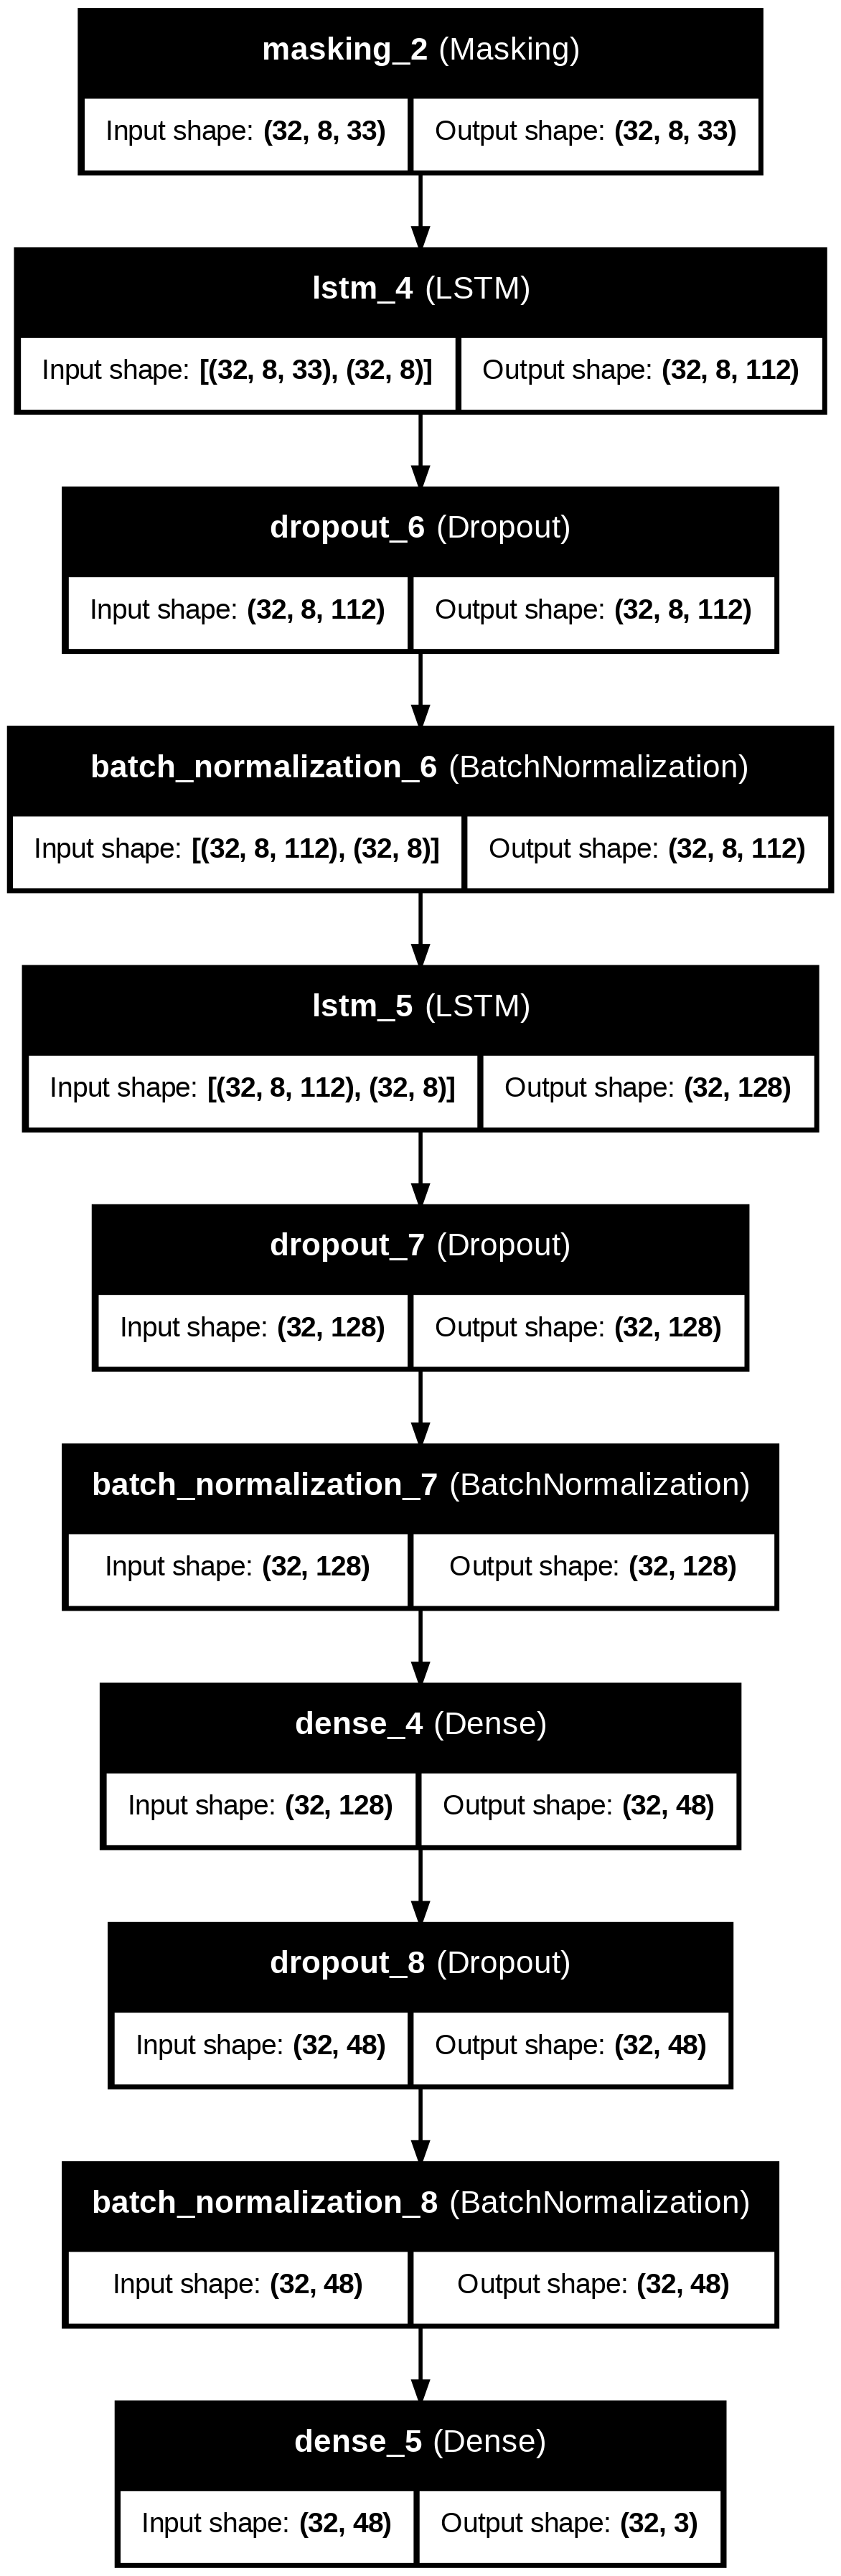

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking, BatchNormalization
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Build a plot-only version of the model with batch size included
def build_plot_model(batch_size=32):
    model = Sequential()
    model.add(tf.keras.layers.Input(batch_shape=(batch_size, X_train_full.shape[1], X_train_full.shape[2])))
    model.add(Masking(mask_value=0.))

    model.add(LSTM(112, return_sequences=True))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())

    model.add(LSTM(128, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())

    model.add(Dense(48, activation='relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())

    model.add(Dense(3, activation='softmax'))

    return model

# Create the plot model
plot_model_with_batch = build_plot_model(batch_size=32)

plot_model(
    plot_model_with_batch,
    to_file="model_architecture_with_batch_horizontal.png",
    show_shapes=True,
    show_layer_names=True
)


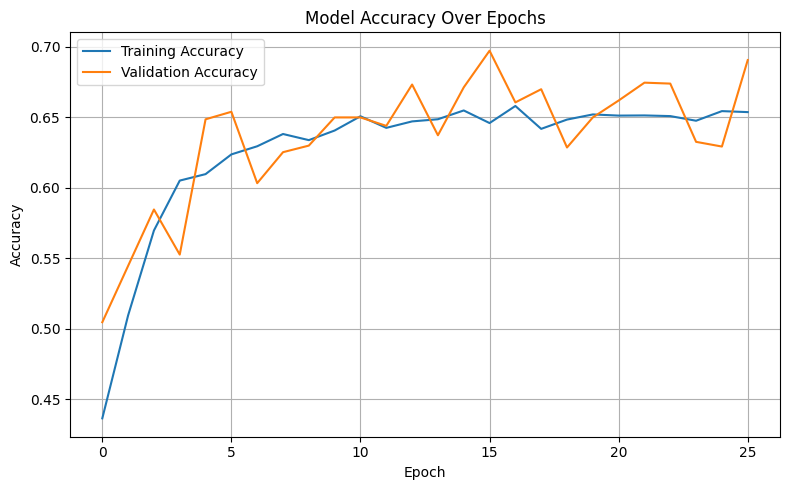

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


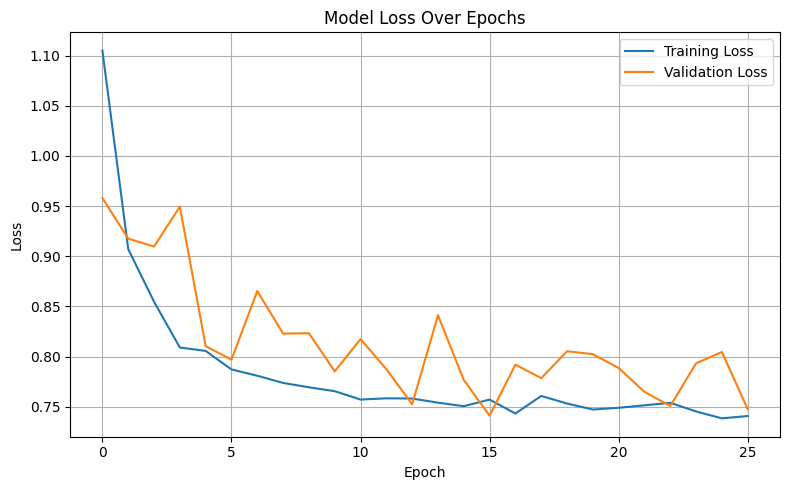

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
'''
Evaluate best model on held out test data.
'''

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on hold-out test set
y_test_pred = final_model.predict(X_test).argmax(axis=1)

# Accuracy and metrics
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred, target_names=['Poor', 'Standard', 'Good']))


79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step
Test Accuracy: 0.6852
              precision    recall  f1-score   support

        Poor       0.73      0.67      0.70       817
    Standard       0.76      0.66      0.71      1230
        Good       0.52      0.78      0.62       453

    accuracy                           0.69      2500
   macro avg       0.67      0.70      0.68      2500
weighted avg       0.71      0.69      0.69      2500



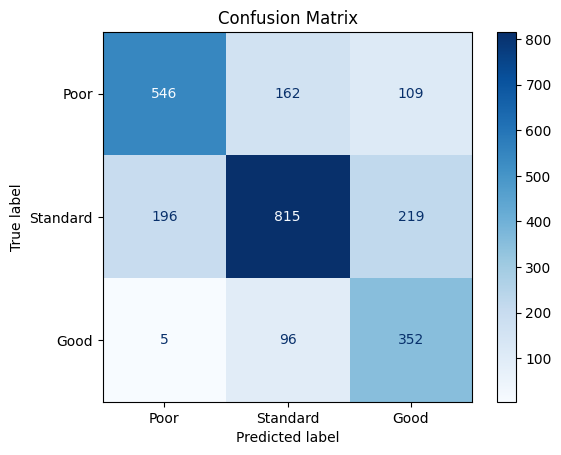

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues', values_format='d')  # 'd' to show integer counts

plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


# Random Forest

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# X_padded: (num_customers, time_steps, num_features)
# y_mode or y_label: single label per customer

# Flatten the time-series by taking the mean over time axis (axis=1)
X_rf = np.mean(X_padded, axis=1)

# Split into train/test (same split as your RNN ideally)
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(
    X_rf, y, test_size=0.2, random_state=1891, stratify=y
)


In [ ]:
# tune the RF model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(random_state=1891)

random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_grid,
                                   n_iter=20,
                                   cv=5,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   verbose=2,
                                   random_state=1891)
random_search.fit(X_rf_train, y_rf_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1891),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=1891, scoring='accuracy', verbose=2)

In [ ]:
rf = RandomForestClassifier(max_depth=30, min_samples_leaf=2,
                               n_estimators=200, random_state=1891)

rf = rf.fit(X_rf_train, y_rf_train)

In [ ]:
y_rf_pred = rf.predict(X_rf_test)

print("Random Forest Accuracy:", accuracy_score(y_rf_test, y_rf_pred))
print(classification_report(y_rf_test, y_rf_pred, target_names=['Poor', 'Standard', 'Good']))


Random Forest Accuracy: 0.7176
              precision    recall  f1-score   support

        Poor       0.80      0.68      0.73       817
    Standard       0.72      0.78      0.75      1230
        Good       0.59      0.61      0.60       453

    accuracy                           0.72      2500
   macro avg       0.70      0.69      0.69      2500
weighted avg       0.72      0.72      0.72      2500



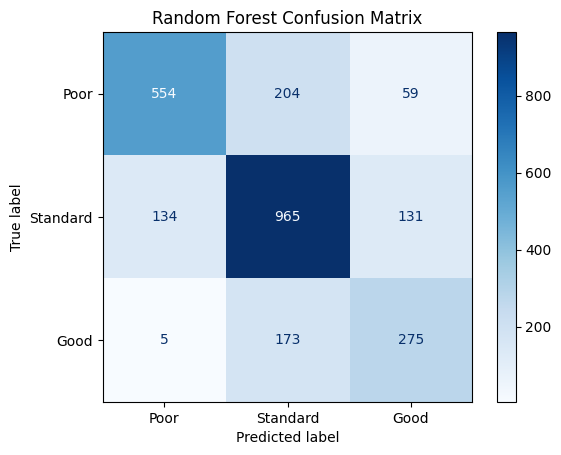

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_rf_test, y_rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Poor', 'Standard', 'Good'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Random Forest Confusion Matrix")
plt.grid(False)
plt.show()
